In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import anderson, shapiro,kstest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

In [2]:
mydata = pd.read_csv("xAPI-Edu-Data.csv")
mydata.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
mydata.shape

(480, 17)

In [4]:
mydata.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [6]:
mydata.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [7]:
mydata.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

#### Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

In [8]:
# Dropping Numerical Datas 
mydata1=mydata.drop(['raisedhands','VisITedResources','AnnouncementsView','Discussion'],axis = 1)
mydata1

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,L


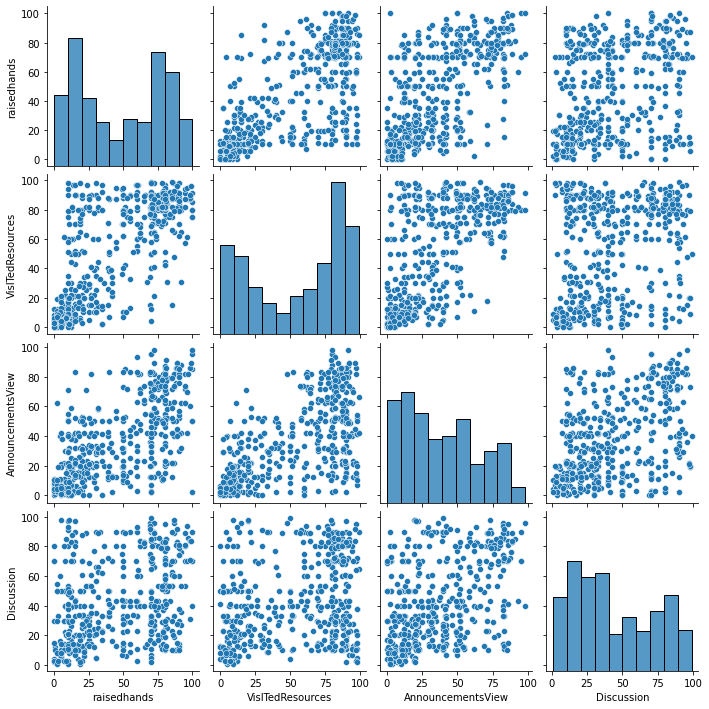

In [9]:
# Visualizing using Pairplot
sns.pairplot(data=mydata)

<AxesSubplot:>

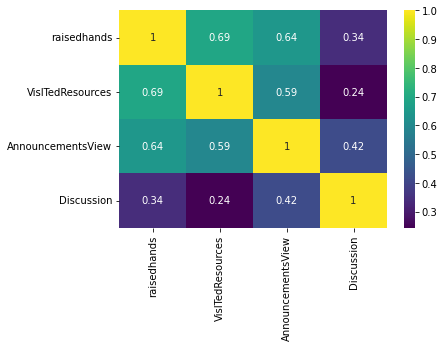

In [10]:
# Co-relation of the Dataset
sns.heatmap(data=mydata.corr(),annot=True,cmap='viridis')

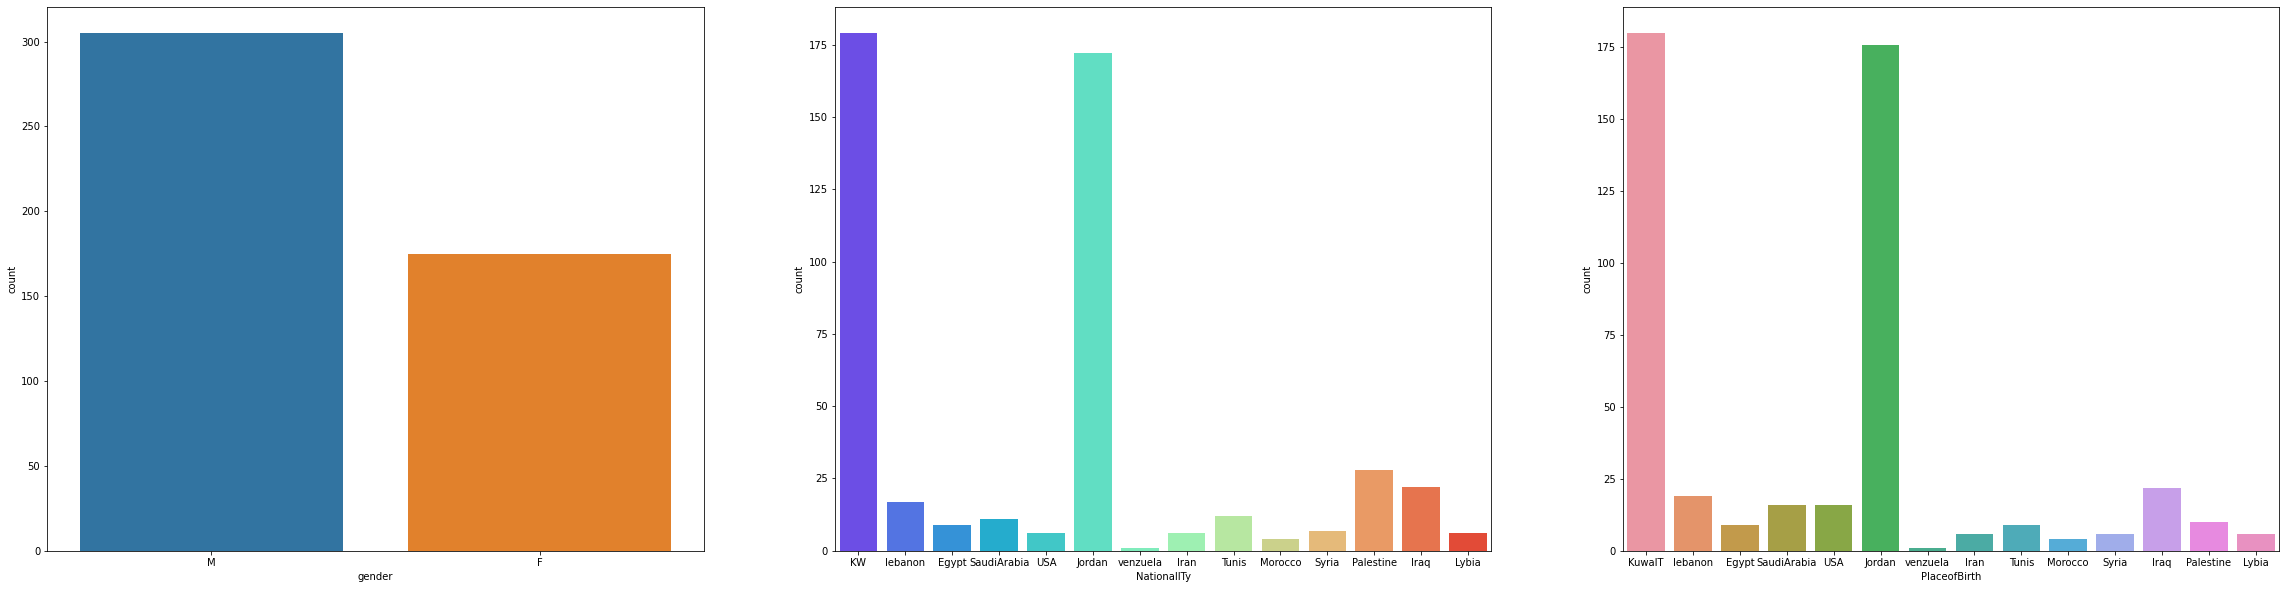

In [11]:
# Visualizing Categorical Datas by doing Univarient Analysis
fig, g = plt.subplots(1, 3, figsize=(40,10))
g1 = sns.countplot(data = mydata, x= 'gender',ax= g[0]);
g2 = sns.countplot(data = mydata, x= 'NationalITy',palette="rainbow",ax= g[1]);
g3 = sns.countplot(data = mydata, x= 'PlaceofBirth',ax= g[2]);

<AxesSubplot:xlabel='StageID', ylabel='count'>

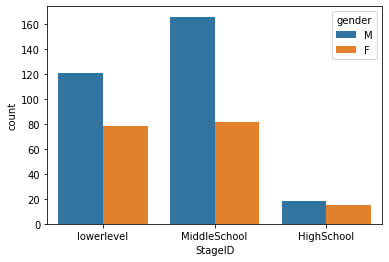

In [12]:
# Visualizing StageID using Countplot (To Show the level of Schools)
sns.countplot(x='StageID',data=mydata,hue='gender')

<AxesSubplot:xlabel='Topic', ylabel='count'>

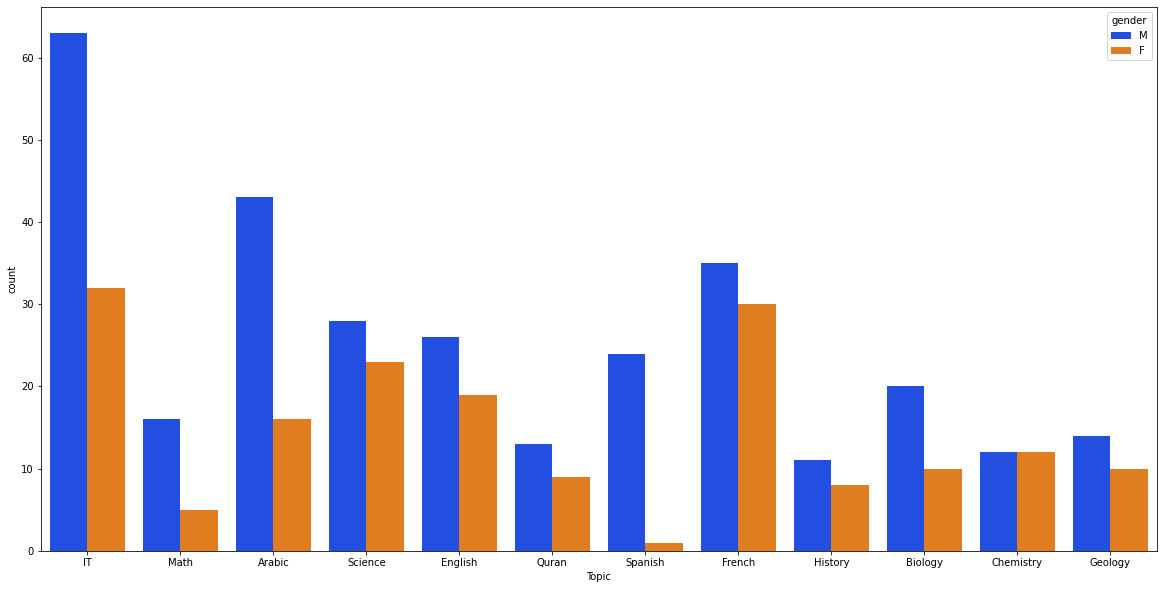

In [13]:
# Visualizing using barplot to show the students in the various departments or subjects plotted genderwise
fig= plt.subplots(1, 1, figsize=(20,10))
sns.countplot(x='Topic',data=mydata, palette='bright',hue='gender')

<AxesSubplot:xlabel='ParentschoolSatisfaction', ylabel='count'>

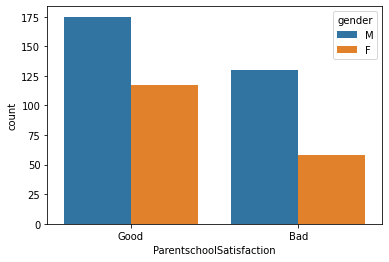

In [14]:
sns.countplot(x='ParentschoolSatisfaction',data=mydata,hue='gender')

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='count'>

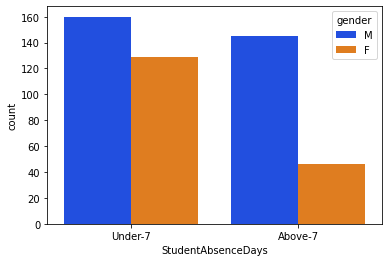

In [15]:
# Using Countplot,it shows how many students were absent that are visulaized genderwise.
sns.countplot(x='StudentAbsenceDays',data=mydata, palette='bright',hue='gender')

### Look at some categorical features in relation to each other, to see what insights could be possibly read

<AxesSubplot:xlabel='ParentAnsweringSurvey', ylabel='count'>

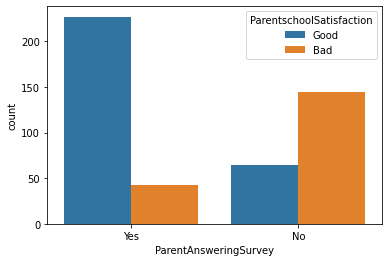

In [16]:
# Using Countplot,it shows the survey of the parent's satisfaction whether it is good or bad
sns.countplot(x='ParentAnsweringSurvey' , hue = 'ParentschoolSatisfaction' , data = mydata) 

<AxesSubplot:xlabel='GradeID', ylabel='count'>

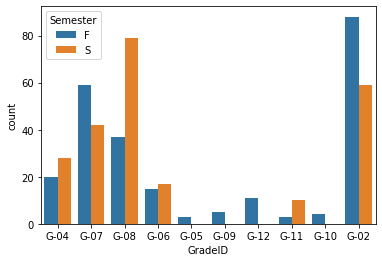

In [17]:
# Using countplot it shows that the semester results of how many students whether they succeed or failed.
sns.countplot(x = 'GradeID' , hue = 'Semester' , data = mydata )

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='count'>

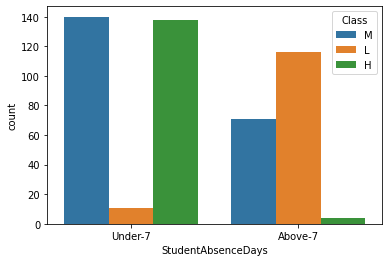

In [18]:
# Using countplot it shows that how many students from different level of schools are plotted
sns.countplot(x = 'StudentAbsenceDays' , hue = 'Class' , data = mydata )

<AxesSubplot:xlabel='StageID', ylabel='count'>

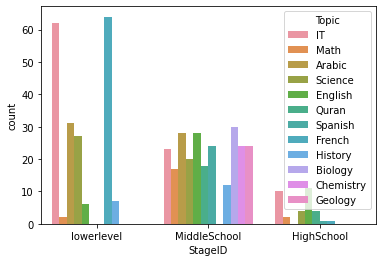

In [19]:
# Using Countplot it is showing that the students from various level of schools and how many of them choses what kind of topics. 
sns.countplot(x = 'StageID' , hue = 'Topic' , data = mydata)

#### Visualize categorical variables with numerical variables and give conclusions?

<AxesSubplot:xlabel='StageID', ylabel='VisITedResources'>

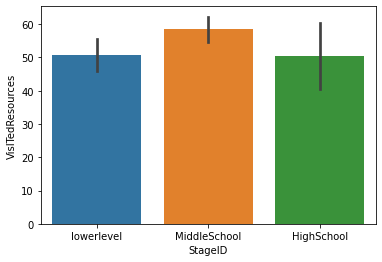

In [20]:
# Using Boxplot we are relating categorical variable with a numerical variable.
sns.barplot(y='VisITedResources',x='StageID',data=mydata)

<Figure size 1440x720 with 0 Axes>

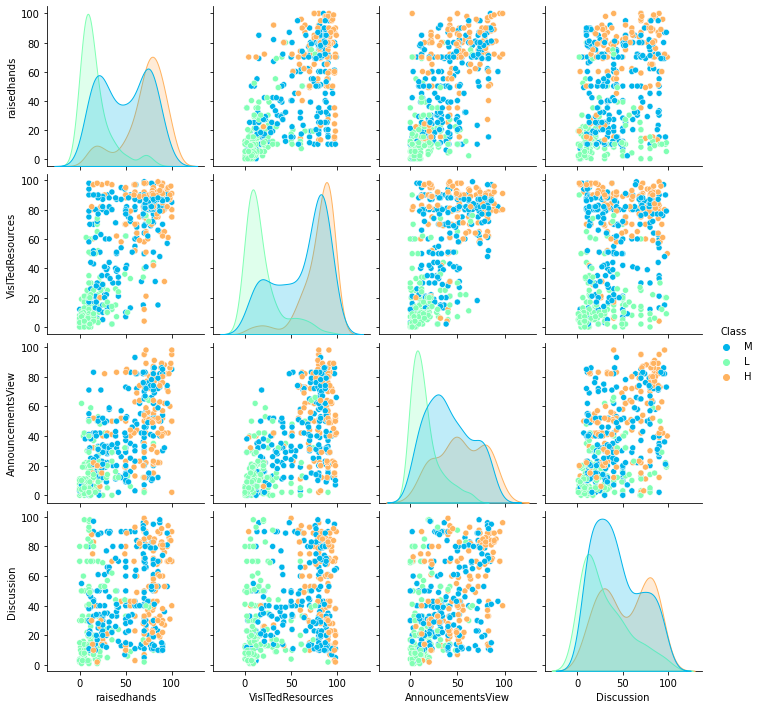

In [21]:
plt.figure(figsize=(20,10))
sns.pairplot(data=mydata, hue='Class',palette='rainbow')

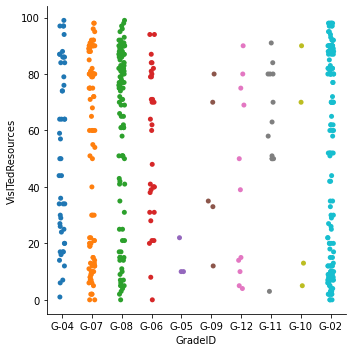

In [22]:
sns.catplot(x="GradeID", y="VisITedResources", data=mydata)

<AxesSubplot:xlabel='GradeID', ylabel='Discussion'>

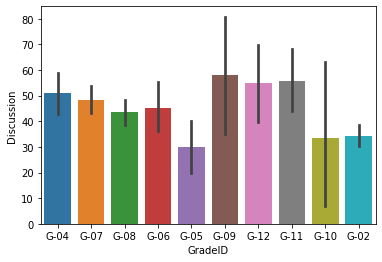

In [23]:
sns.barplot(x='GradeID',y='Discussion',data=mydata)

<AxesSubplot:xlabel='GradeID', ylabel='count'>

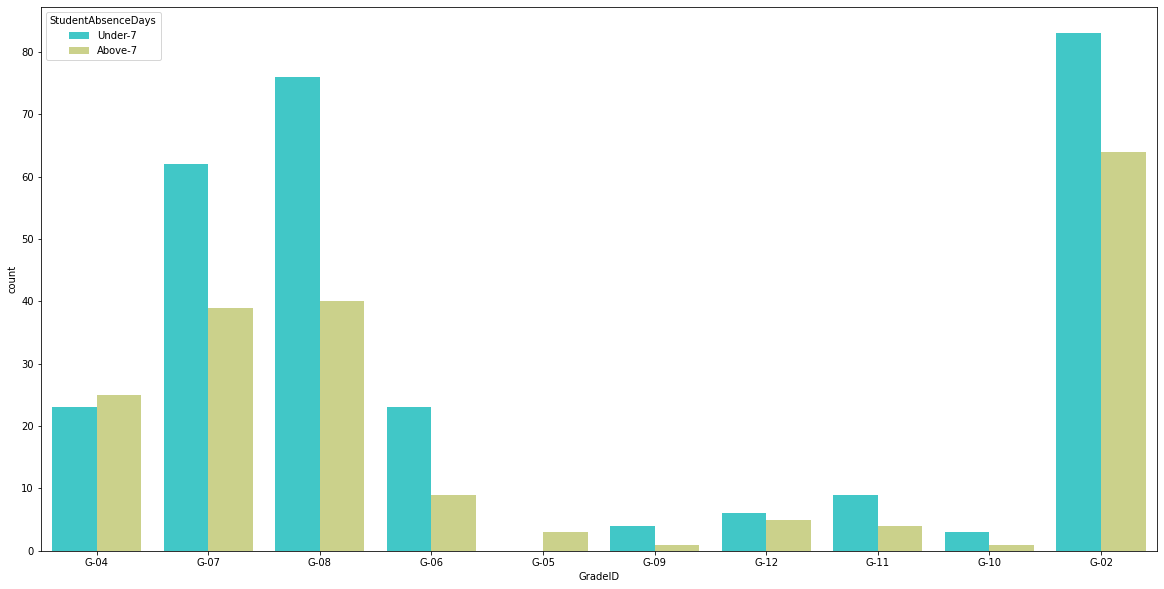

In [24]:
fig= plt.subplots(1, 1, figsize=(20,10))
sns.countplot(x='GradeID',data=mydata, palette='rainbow',hue='StudentAbsenceDays')

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_val=mydata.iloc[:,9:13]
vif=pd.DataFrame()
vif["Features"]=num_val.columns
vif["VIF"]=[variance_inflation_factor(num_val.values,i) for i in range(len(num_val.columns))]

In [26]:
vif

,Features,VIF
0,raisedhands,7.624493
1,VisITedResources,6.893179
2,AnnouncementsView,6.075343
3,Discussion,3.365527
